In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
!cd  /content/drive/MyDrive/AI_final_project
!ls

drive  sample_data


In [28]:
df = pd.read_csv("/content/drive/MyDrive/AI_final_project/最終dataset/30_mapped_data.csv")
df.dropna(inplace=True)

In [29]:
df.head(10)

,Text,Index
0,"['一次', '三週年', '甜點', '盤']",11
1,"['一樣', '好吃']",14
2,"['想當初', '他們', '剛', '開時', '大二', '中間', '疫情']",9
3,"['現在', '畢業', '迎來', '他們', '第三年', '特別', '有感']",14
4,"['抹', '心悸', '好吃']",5
5,"['抹', '心悸', '好吃']",9
6,"['口感', '軟偏', '紮實', '搭', '上', '順口', '濃抹', '鮮奶油'...",9
7,"['微甜', '不膩', '輕柔', '口感', '流連忘返']",5
8,"['搜尋', '地區', '甜食', '吃', '中山', '國', '中']",4
9,"['搜尋', '種類', '甜食', '吃', '千層']",4


### Over-sampling data

In [30]:
X = df["Text"].values
y = df["Index"].values

In [31]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X = X.reshape(-1,1)
X, y = os.fit_resample(X, y)

In [32]:
X = X.reshape(-1,)
X.shape

(129180,)

### Tokenization

In [33]:
import ast
tokenized_sentences = []
for sentence in X:
  actual_list = ast.literal_eval(sentence)
  tokenized_sentences.append(actual_list)

print("Tokenized Sentences (first 10 sentences with stopwords removed):")
for i, sentence in enumerate(tokenized_sentences[:10]):
    print(sentence)

Tokenized Sentences (first 10 sentences with stopwords removed):
['一次', '三週年', '甜點', '盤']
['一樣', '好吃']
['想當初', '他們', '剛', '開時', '大二', '中間', '疫情']
['現在', '畢業', '迎來', '他們', '第三年', '特別', '有感']
['抹', '心悸', '好吃']
['抹', '心悸', '好吃']
['口感', '軟偏', '紮實', '搭', '上', '順口', '濃抹', '鮮奶油', '絕配']
['微甜', '不膩', '輕柔', '口感', '流連忘返']
['搜尋', '地區', '甜食', '吃', '中山', '國', '中']
['搜尋', '種類', '甜食', '吃', '千層']


In [34]:
from keras.preprocessing.text import Tokenizer

# 將分詞結果轉換為文本形式，以便 Tokenizer 使用
tokenized_texts = [" ".join(sentence) for sentence in tokenized_sentences]

# 初始化 Tokenizer 並擬合文本數據
tokenizer = Tokenizer(num_words=80000)
tokenizer.fit_on_texts(tokenized_texts) #字按照頻率排序會計算文本數據中每個詞語的出現頻率，並基於這些頻率構建一個詞彙表。這個詞彙表可以用來將文本轉換為數字序列。

print("Text \n",tokenized_texts[:10],'\n')

# 將文本轉換為數字序列
X_seqs = tokenizer.texts_to_sequences(tokenized_texts)
# 打印數字序列
print("Sequences:")
X_seqs[:10]

Text 
 ['一次 三週年 甜點 盤', '一樣 好吃', '想當初 他們 剛 開時 大二 中間 疫情', '現在 畢業 迎來 他們 第三年 特別 有感', '抹 心悸 好吃', '抹 心悸 好吃', '口感 軟偏 紮實 搭 上 順口 濃抹 鮮奶油 絕配', '微甜 不膩 輕柔 口感 流連忘返', '搜尋 地區 甜食 吃 中山 國 中', '搜尋 種類 甜食 吃 千層'] 

Sequences:


[[105, 6562, 793, 3461],
 [132, 32],
 [8320, 226, 3060, 7210, 12111, 2663, 1462],
 [71, 515, 2549, 226, 8762, 135, 3192],
 [156, 12877, 32],
 [156, 12877, 32],
 [264, 10826, 10827, 221, 63, 1201, 10296, 10828, 5507],
 [12112, 3193, 3860, 264, 12113],
 [752, 1341, 805, 8, 3259, 1692, 92],
 [752, 1096, 805, 8, 7211]]

In [35]:
idx2words = tokenizer.index_word

print("Word Mappings\n")
for i in range(1,21):
    print("Index: ",i, "---->",idx2words[i])

Word Mappings

Index:  1 ----> 想
Index:  2 ----> 活動
Index:  3 ----> 參加
Index:  4 ----> 喜歡
Index:  5 ----> 真的
Index:  6 ----> 一起
Index:  7 ----> 看
Index:  8 ----> 吃
Index:  9 ----> 演唱會
Index:  10 ----> 抽
Index:  11 ----> 奶昔
Index:  12 ----> 發
Index:  13 ----> 信箱
Index:  14 ----> 友愛
Index:  15 ----> 大哥
Index:  16 ----> 影片
Index:  17 ----> 二
Index:  18 ----> 平台
Index:  19 ----> 拍照
Index:  20 ----> 天天


In [36]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 19186


padding (把seqence轉成一樣長度)

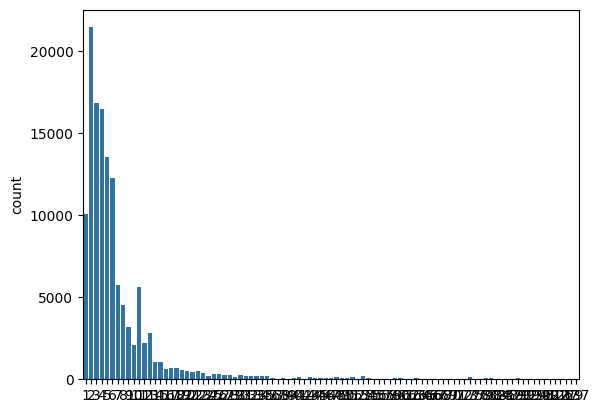

In [37]:
lens = [len(seq) for seq in X_seqs]
sns.countplot(x=lens)
plt.show()

In [ ]:
max(lens)

137

In [38]:
from keras.preprocessing.sequence import pad_sequences

max_len=140
X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)

In [ ]:
print("Before Padding")
print(X_seqs[:1])

print("\nAfter Padding")
print(X_seqs_pd[:1])

Before Padding
[[79, 8682, 939, 8101]]

After Padding
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0   79 8682  939 8101]]


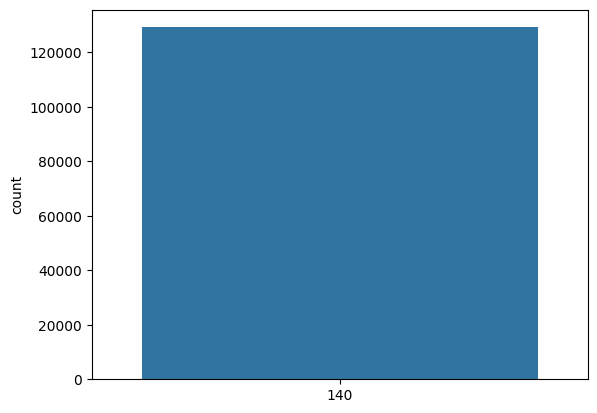

In [39]:
lens = [len(seq) for seq in X_seqs_pd]
sns.countplot(x=lens)
plt.show()

### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X_seqs_pd, y, test_size=0.2, random_state=105)
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

print("Test X Dim ",X_test.shape)
print("Test y Dim ",y_test.shape)

Training X Dim  (103344, 140)
Training y Dim  (103344,)
Test X Dim  (25836, 140)
Test y Dim  (25836,)


### Bidirectional-LSTM

In [41]:
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D



vocabulary_size = vocab_size
seq_len = 140
embed_len=128


model = Sequential()
model.add(Embedding(vocabulary_size+1, embed_len, input_length=seq_len))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(30, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 128)          2455936   
                                                                 
 bidirectional (Bidirection  (None, 140, 160)          133760    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 140, 160)          154240    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 160)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                        

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=0,verbose=1)

model.compile(loss = 'categorical_crossentropy',
             optimizer = "adam",
             metrics=["accuracy"])

In [43]:
from keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [44]:
batch_size=64
epochs = 15

model.fit(X_train, y_train_cat, batch_size=batch_size, epochs = epochs,
          shuffle=True,validation_data=(X_test, y_test_cat), callbacks=[early_stop])

Epoch 1/15
1615/1615 [==============================] - 86s 48ms/step - loss: 2.1454 - accuracy: 0.3897 - val_loss: 1.2915 - val_accuracy: 0.6400
Epoch 2/15
1615/1615 [==============================] - 49s 30ms/step - loss: 1.2146 - accuracy: 0.6663 - val_loss: 0.9337 - val_accuracy: 0.7371
Epoch 3/15
1615/1615 [==============================] - 47s 29ms/step - loss: 0.9562 - accuracy: 0.7366 - val_loss: 0.8148 - val_accuracy: 0.7760
Epoch 4/15
1615/1615 [==============================] - 47s 29ms/step - loss: 0.8365 - accuracy: 0.7685 - val_loss: 0.7459 - val_accuracy: 0.7919
Epoch 5/15
1615/1615 [==============================] - 48s 30ms/step - loss: 0.7609 - accuracy: 0.7892 - val_loss: 0.7086 - val_accuracy: 0.8012
Epoch 6/15
1615/1615 [==============================] - 47s 29ms/step - loss: 0.7076 - accuracy: 0.8011 - val_loss: 0.6817 - val_accuracy: 0.8076
Epoch 7/15
1615/1615 [==============================] - 47s 29ms/step - loss: 0.6713 - accuracy: 0.8099 - val_loss: 0.6531 -

In [46]:
model.evaluate(X_test, y_test_cat, batch_size=batch_size)

404/404 [==============================] - 8s 19ms/step - loss: 0.6005 - accuracy: 0.8322


[0.6004922986030579, 0.832172155380249]

In [47]:
model.save('/content/drive/MyDrive/AI_final_project/30BLSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
import tensorflow.keras
from tensorflow import keras

newmodel = keras.models.load_model("/content/drive/MyDrive/AI_final_project/30BLSTM_model.h5")
newmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 140, 128)          2455936   
                                                                 
 bidirectional (Bidirection  (None, 140, 160)          133760    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 140, 160)          154240    
 onal)                                                           
                                                                 
 global_max_pooling1d (Glob  (None, 160)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                        

In [49]:
newmodel.evaluate(X_test, y_test_cat, batch_size=batch_size)

404/404 [==============================] - 7s 12ms/step - loss: 0.6005 - accuracy: 0.8322


[0.6004922986030579, 0.832172155380249]

### Mapping

In [16]:
emoji_raw = open('/content/drive/MyDrive/AI_final_project/最終dataset/40_mapping_emojis.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    sentence = sentence.rstrip()
    emojis.append(sentence)


emoji_dict={}

for e in emojis:
    idx = int(e.split()[0])
    emoji = e.split()[1]
    emoji_dict[idx] = emoji

In [17]:
emoji_dict

{0: '😍',
 1: '❤',
 2: '😂',
 3: '🔥',
 4: '🏻',
 5: '🤣',
 6: '🙌',
 7: '💜',
 8: '😢',
 9: '\U0001f979',
 10: '🐦',
 11: '✨',
 12: '👏',
 13: '📍',
 14: '😭',
 15: '💌',
 16: '🥺',
 17: '😆',
 18: '👍',
 19: '💙',
 20: '🤩',
 21: '\U0001faf6',
 22: '🥰',
 23: '📸',
 24: '😋',
 25: '🥲',
 26: '🙏',
 27: '💗',
 28: '🤤',
 29: '◾',
 30: '💟',
 31: '👉',
 32: '😮',
 33: '📺',
 34: '😻',
 35: '💚',
 36: '🔺',
 37: '💪',
 38: '🎉',
 39: '🌟'}

In [50]:
import jieba
jieba.set_dictionary('/content/drive/MyDrive/AI_final_project/dict.txt.big.txt')

def get_stopwords(file):
    stopword_list = []
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            stopword_list.append(line)
    return stopword_list

def remove_stopwords(sentence, stopwords):
    return [word for word in sentence if word not in stopwords and word.strip()]

stopwords = get_stopwords('/content/drive/MyDrive/AI_final_project/stopwords.txt')

def preprocess_text(X):
    tokenized_sentences = []
    for sentence in X:
      words = list(jieba.cut(sentence))
      filtered_words = remove_stopwords(words, stopwords)
      tokenized_sentences.append(filtered_words)
    tokenized_texts = [" ".join(sentence) for sentence in tokenized_sentences]

    max_len=140
    X_seqs = tokenizer.texts_to_sequences(tokenized_texts)
    X_seqs_pd = pad_sequences(X_seqs, truncating="pre", padding="pre", maxlen=max_len)
    return X_seqs_pd

In [51]:
def predict_emoji(text):
    X_sequences = preprocess_text([text])
    predictions = np.argmax(model.predict(X_sequences), axis=1)
    emoji_idx = predictions[0]
    emoji = emoji_dict[emoji_idx]

    return emoji

In [53]:
text = input("Enter text\n\n")

print("\n\nEmojified Text\n\n")
print(text + " " + predict_emoji(text))

Enter text

今天開心


Emojified Text


1/1 [==============================] - 0s 24ms/step
今天開心 ❤


In [ ]:
paragraph = '''
近期（2024年3月直至今日），連續的食安風暴襲捲了臺灣及日本兩地，大至蘇丹紅色素案、寶林茶室中毒案、小林製藥紅麴產品汙染事件等，小至遍及全台各地的食品中毒事件，無不讓整體社會人心惶惶，甚至產生下列之疑惑：我們要如何確定生活中所吃到的任何食物（食品）都是安全的呢？食安相關規定又是如何為國人健康把關？以下筆者便會以上述所列之食安事件為例，除了為各位讀者簡述引發該案之緣由，更針對其涉及之食安規定、準則等做詳述及討論，讓大家能更認識食安的整體相關運作體系。

'''

In [ ]:
paragraph = input("Enter text\n\n")

Enter text

藍色憂鬱的日子


In [ ]:
import re
def emojify_paragraph(paragraph):
    # 按行分割输入段落
    lines = re.split(r'[\n，。]', paragraph)
    emojified_lines = []

    # 逐行处理每一行
    for line in lines:
        if line.strip():  # 如果行非空
            emojified_line = line + predict_emoji(line)
            emojified_lines.append(emojified_line)
        else:
            emojified_lines.append(line)

    # 重新组合成一个段落
    emojified_paragraph = '\n'.join(emojified_lines)
    return emojified_paragraph

print(paragraph+'\n')
print(emojify_paragraph(paragraph))


藍色憂鬱的日子

1/1 [==============================] - 0s 26ms/step
藍色憂鬱的日子👏


### Model Evaluation

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

print(classification_report(y_test, predicted_labels))

808/808 [==============================] - 7s 9ms/step
              precision    recall  f1-score   support

           0       0.53      0.21      0.30       822
           1       0.66      0.32      0.43       878
           2       0.86      0.67      0.75       830
           3       0.71      0.64      0.67       844
           4       0.81      0.44      0.57       838
           5       0.85      0.88      0.87       844
           6       0.67      0.70      0.69       826
           7       0.99      0.97      0.98       901
           8       0.90      0.88      0.89       873
           9       0.82      0.81      0.81       859
          10       0.99      1.00      0.99       869
          11       0.90      0.87      0.88       879
          12       0.86      0.78      0.82       838
          13       0.99      1.00      0.99       831
          14       0.87      0.91      0.89       884
          15       0.91      1.00      0.95       898
          16       0.79   